## <h1><center>THE GRILLED TACOS<h1><center>

![alt text](image-2.png)

# <h1><center>Sentiment Analysis for Foody&Fooodie<h1><center>

### Team Members #
*  Joseph Hinga
*  Joan Nyamache
*  Eugene Marius
* George Kariuki
* Samuel Gichuru

## Business Understanding

### Overview
Foody&Foodie are a family run restaurant in San francisco, CA. As a veteran in the food business they understand that they will need to keep track of sentiments from their customer base to maintain a competitive edge in the market.




### Problem Statement
The management of Foody&Foodie understand the need to find reliable feedback to guide their decision-making aiming to improve their business and match their markets ever changing needs. 


### Challenges
Within the Food industry, they're several measurable parameters to that determine the success of a restaurant and we must find a neutral data set where all these aspects can be fairly evaluated for an accurate result.

### Proposed solution
We will need to create a model to analyze customer sentiments through reviews on restaurants within the target area using a single popular review site, Yelp, to pull the relevant data as it is the most comprehensive compilation of reviews in the target market.



### Objectives
#### Main Objective
- To create a model that could successfully predict the sentiment of a customer’s review. The model would attain a recall score and accuracy score above 80%

#### Specific Objective
- To identify the most common words used in the dataset using a Word cloud.
- To confirm the most common words that are positively and negatively tagged.
- To recognize the products that have been opined by the customers.
- To spot the distribution of the sentiments.

### Workplan

1. Loading the Dataset: Import the review dataset

2. Data Understanding: Analyze the dataset's structure and content.

3. Target Variable Identification: Select key variables for analysis.

4. Data Preparation: Clean the data, and ensure data integrity.

5. Encoding Categorical Variables: Convert categorical data for modeling.

6. Model Evaluation: Evaluate model performance using appropriate metrics.

7. Deployment: Forecast food reviews using trained models.

8. Insights and Conclusions: Provide actionable insights and recommendations based on our findings.















## Data Understanding
Our dataset is a compilation of writen reviews, ratings, review IDs, review date and business IDs from the Yelp website. The compilation of this data allows us to clearly identfy positive and negatve sentiments in relation to a rating given on a scale of 1-5 as well as reactions to the sentiment by readers categorized as cool, useful or funny. 
Post cleaning the data, these are the metrics we will use to isolate and model a collective non biased scale of opinions on restarunts in the area.

The dataset for this analysis is sourced from Yelp and contains detailed food reviews. It encompasses a total of 429,771 rows and 8 columns, structured in a wide format.

Dataset Overview:
Source: Yelp Website
Total Rows:429,771
Total Columns: 8
Column Details:

* Review_id:  A unique identifier assigned to each review.
_Data Type_: Integer (object)

* User_ID: A unique identifier assigned to each user.
Data Type: Integer (object)

* Business_id : A unique identifier assigned to each Business.
Data Type: String (object)

* Stars: The ratings of reviews.
Data Type: String (int64)

* Useful: Categorization of the review.
Data Type: String (int64)

* Fuuny: Categorization of the review.
Data Type: String (int64)

* Cool: Categorization of the review
Data Type: Integer (int64)

* Text: The review.
Data Type: Float (float64)

* Date: Date when the review was written.
Data Type: Integer (float64)


In [ ]:
##importing libraries

In [1]:
# importing data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter

# Loading data

In [32]:
# Load restaurant data - This also works
df = pd.read_csv("data.zip")

# Data Preparation

In [34]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
3,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
4,u0smrr16uVQ8pgSEseXcKg,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5,0,0,0,So day 2 in Nashville. I gotta get some BBQ. M...,2021-03-17 20:09:00


In [35]:
df.tail()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
429766,A5uNiAOGcU0M34sSGN6Wkg,JWhZs-vSggwN6WgxBHgIDw,B2xtWMBTyDtd-ndqqaIC1Q,1,0,0,0,Sat at the bar for 10 minutes and didn't get s...,2022-01-15 15:41:15
429767,1ryZLb9pSBz0y66tHB-rfw,XJTO9x78TgWE94cmXqNduA,c3QxX3toWdqJnKQmmIliRQ,1,1,2,0,"The supper club is ridiculously expensive. So,...",2021-11-29 18:26:40
429768,PVRvzY0NxSU-fiK3JOXX7w,cTozFTTWjlFYc3yusdbZmA,uMVOtr16r1ELu46pWr4HCQ,1,0,0,0,Just average Thai food tonight. Bangkok has al...,2022-01-18 06:42:59
429769,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
429770,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [36]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429771 entries, 0 to 429770
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    429771 non-null  object
 1   user_id      429771 non-null  object
 2   business_id  429771 non-null  object
 3   stars        429771 non-null  int64 
 4   useful       429771 non-null  int64 
 5   funny        429771 non-null  int64 
 6   cool         429771 non-null  int64 
 7   text         429771 non-null  object
 8   date         429771 non-null  object
dtypes: int64(4), object(5)
memory usage: 29.5+ MB


In [59]:
df.describe

<bound method NDFrame.describe of         stars  useful  funny  cool  \
0           5       0      0     0   
1           1       0      0     0   
2           5       0      0     0   
3           5       0      0     0   
4           5       0      0     0   
...       ...     ...    ...   ...   
429766      1       0      0     0   
429767      1       1      2     0   
429768      1       0      0     0   
429769      5       1      0     1   
429770      5       1      0     0   

                                                     text  \
0       ive eating restaurant year staple ab family li...   
1       delivery person get lost heard google map food...   
2       service always good employee nice vegan africa...   
3       two word whipped feta explosion amazingness hi...   
4       day nashville got ta get bbq cousin recommende...   
...                                                   ...   
429766  sat bar minute didnt get served people bar bar...   
429767  supper club r

## Data Cleaning

Validity

In [39]:
# Drop irrelevant columns
df = df.drop(columns=['review_id', 'user_id', 'business_id'])

In [7]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)


In [8]:
# Check for missing values
df.isnull().sum()

df.dropna(inplace=True)

In [9]:
#Handling missing values

 # Convert non-string values to strings, filling NaNs with an empty string
df['text'] = df['text'].fillna('').astype(str)

# Calculate the length of each text entry
df['text_Length'] = df['text'].apply(len)

# Display summary statistics of the text lengths
print(df['text_Length'].describe())

count    429771.000000
mean        477.570871
std         441.488873
min           1.000000
25%         194.000000
50%         340.000000
75%         602.000000
max        5000.000000
Name: text_Length, dtype: float64


In [49]:
# Define a function to categorize reviews
def categorize_review(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new column
df['review_category'] = df['stars'].apply(categorize_review)

# Display the DataFrame with the new column
df.head(2)

,stars,useful,funny,cool,text,date,text_Length,review_category
0,5,0,0,0,ive eating restaurant year staple ab family li...,2021-01-08 01:49:36,404,positive
1,1,0,0,0,delivery person get lost heard google map food...,2021-01-02 00:19:00,315,negative


## Data Preprocessing

In [10]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()

In [11]:
# Remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [12]:
# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [13]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [14]:
# Initialize the WordNet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kerub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Path to the existing file
file_path = r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt'

# Save the cleaned data, overwriting the original file
df.to_csv(file_path, index=False)

print(f"Cleaned data has been saved and overwritten the existing file: {file_path}")


Cleaned data has been saved and overwritten the existing file: C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt


In [44]:
#Loading the cleaned dataset
# Path to the CSV file
file_path = r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt'

df = pd.read_csv(r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt')

# Display the first five rows
print(df.head())


   stars  useful  funny  cool  \
0      5       0      0     0   
1      1       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                 date  \
0  ive eating restaurant year staple ab family li...  2021-01-08 01:49:36   
1  delivery person get lost heard google map food...  2021-01-02 00:19:00   
2  service always good employee nice vegan africa...  2021-01-26 18:01:45   
3  two word whipped feta explosion amazingness hi...  2021-01-27 23:28:03   
4  day nashville got ta get bbq cousin recommende...  2021-03-17 20:09:00   

   text_Length  
0          404  
1          315  
2          116  
3          284  
4          586  


## Exploratory Data Analysis (EDA) ##

### Word Cloud Visualization

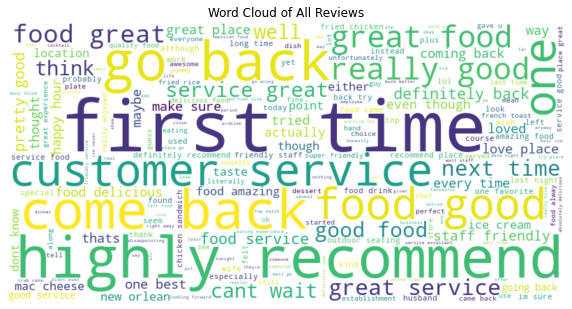

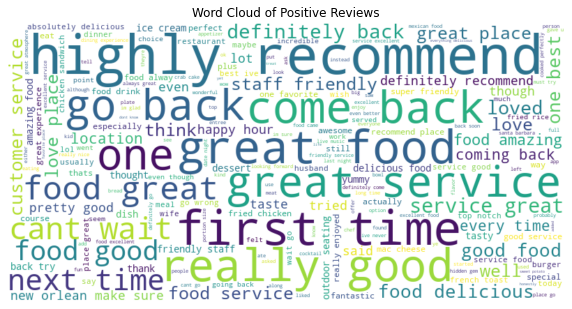

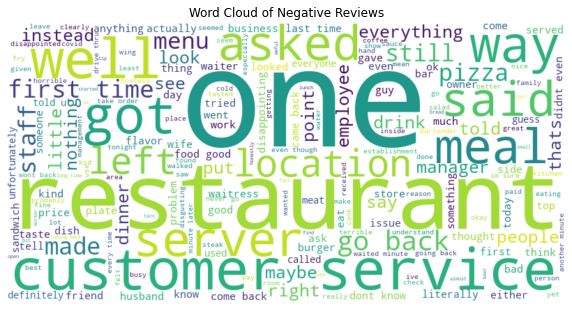

In [63]:
from wordcloud import WordCloud

# Generate a word cloud for the entire dataset
all_reviews = ' '.join(df['text'].dropna())  # Drop any NaN values if present
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

# Generate separate word clouds for positive and negative sentiments if labeled
if 'text' in df.columns:
    # Filter out any NaN values
    positive_reviews = ' '.join(df[df['review_category'] == 'positive']['text'].dropna())
    negative_reviews = ' '.join(df[df['review_category'] == 'negative']['text'].dropna())

    if positive_reviews:
        # Positive reviews word cloud
        wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud_positive, interpolation="bilinear")
        plt.axis('off')
        plt.title('Word Cloud of Positive Reviews')
        plt.show()
    else:
        print("No positive reviews available for the word cloud.")

    if negative_reviews:
        # Negative reviews word cloud
        wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud_negative, interpolation="bilinear")
        plt.axis('off')
        plt.title('Word Cloud of Negative Reviews')
        plt.show()
    else:
        print("No negative reviews available for the word cloud.")


##### ***Observation***

The word cloud suggests that customers generally have a positive experience, with food and service being the primary factors influencing their satisfaction. While there are some negative mentions, the overall sentiment leans towards positive.

### Distribution of Review Lengths

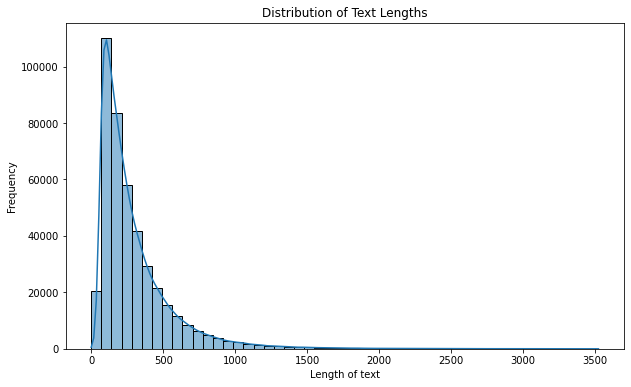

In [22]:
# Plot the distribution of review lengths

plt.figure(figsize=(10, 6))
sns.histplot(df['text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

The majority of short reviews suggest users prefer brief comments, suggesting businesses should focus on concise messaging. The content may include quick impressions or detailed experiences, offering insights into customer satisfaction. Data analysis should consider skewness and median word count.

#### Distribution of Star Ratings

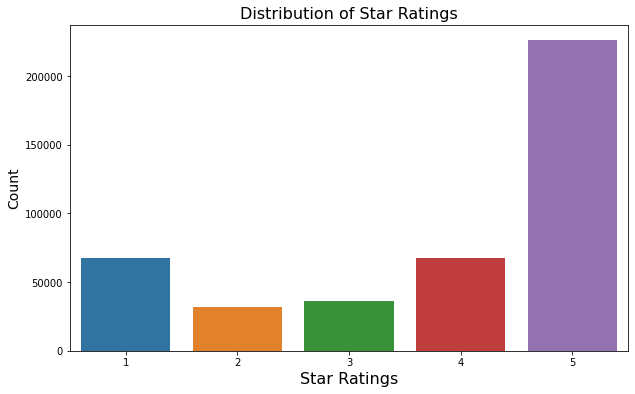

In [23]:
# Bar plot for the distribution of star ratings
plt.figure(figsize=(10, 6))

sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Star Ratings', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()


The high number of 5-star reviews on Yelp may make it challenging to distinguish outstanding businesses from average ones due to the skewed nature of ratings. Additionally, Yelp reviewers may be more motivated to leave a review after a positive experience.

#### Distribution of "Cool", "Useful", and "Funny" Votes

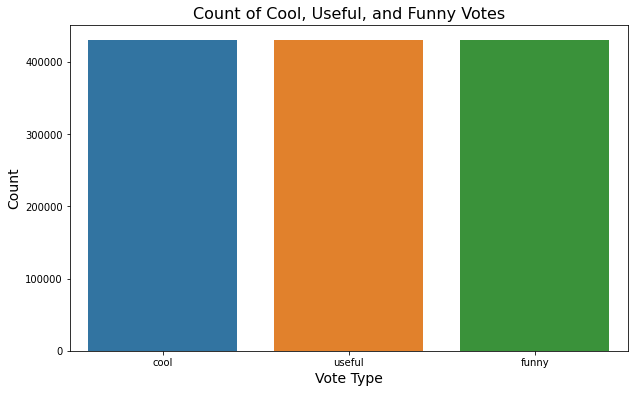

In [24]:
# Reshape the DataFrame to long format
df_melted = df[['cool', 'useful', 'funny']].melt(var_name='Vote Type', value_name='Count')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(x='Vote Type', data=df_melted)

plt.title('Count of Cool, Useful, and Funny Votes', fontsize=16)
plt.xlabel('Vote Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

This shows a relatively even distribution of the three vote types, with all three categories receiving a similar number of votes.Lets do a further analysis

 ### Top Most Frequent Words

Lets dentify the most frequent words that can help understand common themes in the dataset.

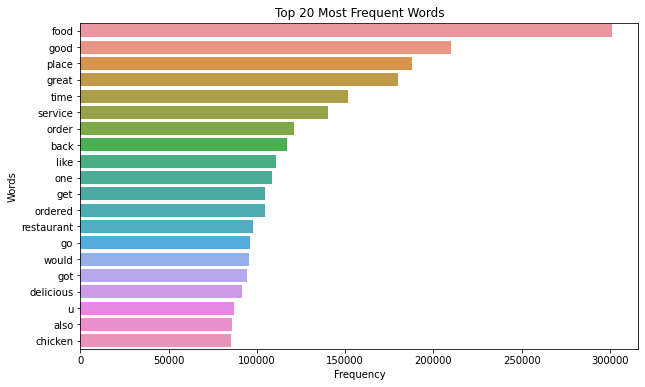

In [61]:
# Tokenize the reviews and remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Flatten the list of tokens
all_words = [word for tokens in df['Tokens'] for word in tokens]

# Get the frequency distribution of words
word_freq = Counter(all_words)

# Plot the top N most frequent words
top_n = 20
common_words = word_freq.most_common(top_n)
words, counts = zip(*common_words)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Word': words, 'Frequency': counts})

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_plot)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

The majority of reviews express positive sentiments, indicating customer satisfaction at restaurants. Key positive keywords focus on food quality and customer service, indicating their importance. 

## Distribution of Review Category

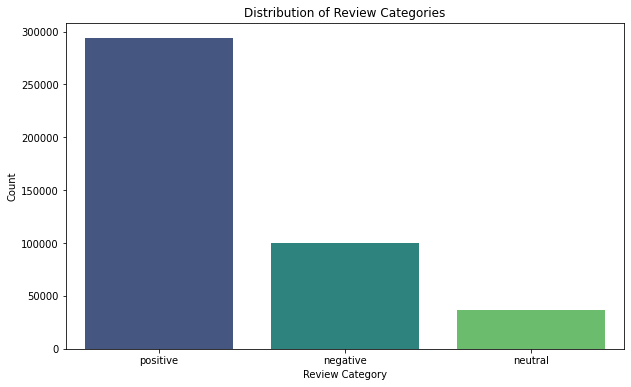

In [60]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Review Category')
plt.ylabel('Count')
plt.title('Distribution of Review Categories')
plt.show()

Dominance of Positive Reviews: The most prevalent category is "positive," indicating a higher proportion of positive sentiment among the reviews.

Decreasing Sentiment: The frequency of reviews gradually decreases from positive to negative, with neutral reviews occupying the smallest portion.

Potential Imbalance: The significant difference in the count of positive and negative reviews suggests a potential class imbalance issue, which might impact the performance of our sentiment analysis model.

### Plotting the most frequent 2-word bigrams for each sentiment category 

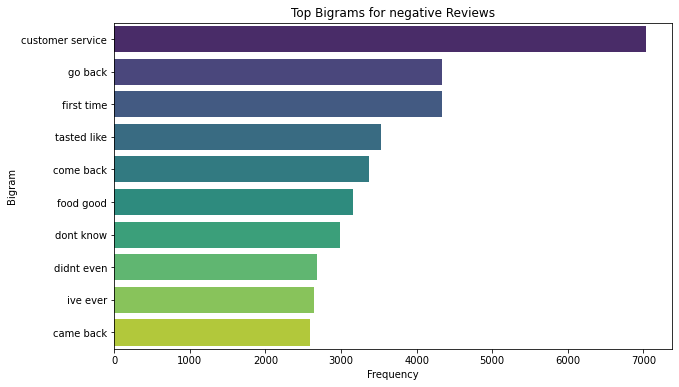

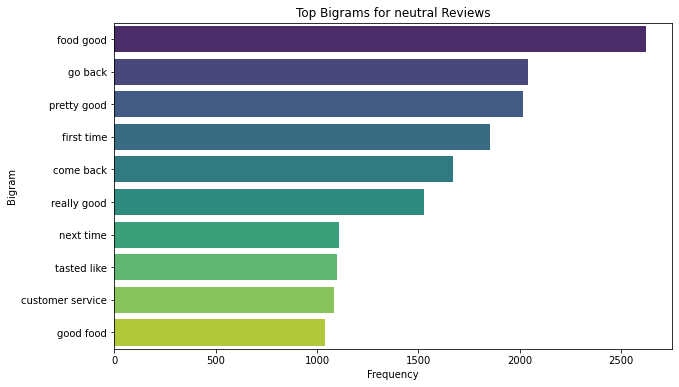

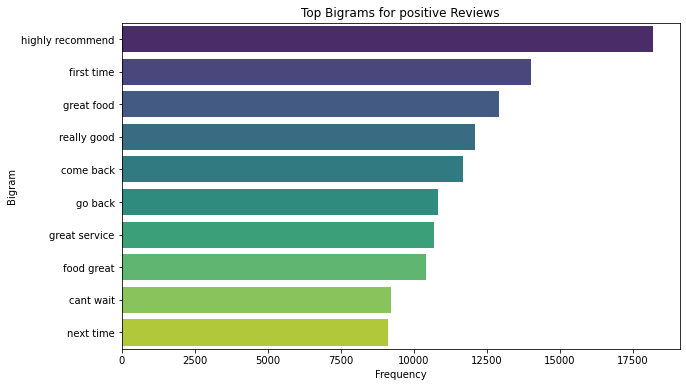

In [55]:
from nltk import bigrams, FreqDist

# Function to extract bigrams from text
def extract_bigrams(text):
    tokens = word_tokenize(text.lower())
    return list(bigrams(tokens))

df['text'] = df['text'].fillna('')

# Generate bigrams for each review category
bigrams_by_category = df.groupby('review_category')['text'].apply(lambda texts: [bigram for text in texts for bigram in extract_bigrams(text)])

# Count bigrams and plot
for category, bigram_list in bigrams_by_category.items():
    freq_dist = FreqDist(bigram_list)
    most_common_bigrams = freq_dist.most_common(10)  # Adjust number of bigrams to show
    
    # Convert to DataFrame for plotting
    bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
    bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
    plt.title(f'Top Bigrams for {category.title()} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.show()


* Negative Reviews: Customer service is the most frequently mentioned area for improvement in negative reviews. This suggests a need to address potential issues in customer service training or procedures.

* Neutral Reviews: Food quality appears to be the primary focus in neutral reviews. While this isn't necessarily bad, it indicates a lack of strong opinions about other aspects like service or atmosphere.

* Positive Reviews: Customers express satisfaction with both service and food in positive reviews, often recommending the establishment to others. This highlights the positive aspects of the dining experience.

### Correlation Analysis

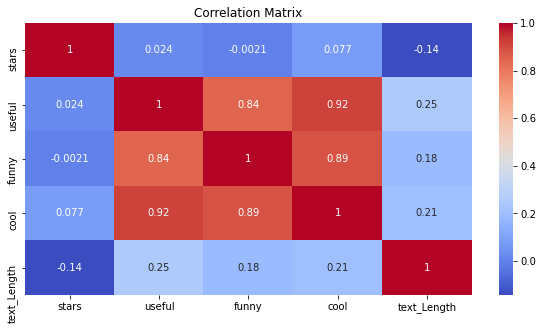

In [ ]:
if df.select_dtypes(include=['number']).shape[1] > 0:  
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

## High Positive Correlation:

There's a strong positive correlation between 'useful', 'funny', and 'cool' votes. This suggests that if a review gets one of these votes, it's likely to receive the others as well.
There's also a moderate positive correlation between 'stars' and 'useful', 'funny', and 'cool' votes, indicating that higher-rated reviews tend to get more of these votes.

## Low Correlation:

'text_length' has a weak correlation with the other variables, suggesting that the length of a review doesn't significantly impact the type of votes it receives.
Visual Representation: